In [1]:
import pandas as pd #data manipulation
import numpy as np #calculus and algebra
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passenger_movement_df = pd.read_csv('TRBM1.20240317134742.csv')

Exploring the data set

In [3]:
passenger_movement_df.head(30) #Displaying first 30 rows (Cork airport only opened in 1961)
#Issue with the TLIST(M1) - the months need to be turned into decimal form

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0
5,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,4,Passenger Movement by Air from All Airports,Number,18098.0
6,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,41,Passenger Movement by Air from Dublin Airport,Number,16762.0
7,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,42,Passenger Movement by Air from Cork Airport,Number,0.0
8,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,43,Passenger Movement by Air from Shannon Airport,Number,1336.0
9,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,431,Passenger Movement by Air from Shannon Airport...,Number,747.0


In [4]:
#function to convert imported year to a decimal
def year_month_to_decimal(year_month):
    year = int(year_month[:4])
    month = int(year_month[4:])
    decimal_month = month / 12.0
    return year + decimal_month

In [5]:
passenger_movement_df['TLIST(M1)'] = passenger_movement_df['TLIST(M1)'].astype(str)
passenger_movement_df['decimal_year'] = passenger_movement_df['TLIST(M1)'].apply(year_month_to_decimal)
passenger_movement_df['decimal_year'] = passenger_movement_df['decimal_year'].astype(float)
passenger_movement_df

,STATISTIC,STATISTIC Label,TLIST(M1),Month,DIRECT,Direction,TYPASS,Type of Passenger Movement,UNIT,VALUE,decimal_year
0,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,1,Passenger Movement by Sea to All Countries,Number,20102.0,1961.083333
1,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,11,Passenger Movement by Sea to Great Britain,Number,19963.0,1961.083333
2,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,12,Passenger Movement by Sea to Countries Other T...,Number,139.0,1961.083333
3,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,2,Passenger Movement Cross-Border Rail,Number,10344.0,1961.083333
4,TRBM1,Passenger Movement,196101,1961M01,1,Arriving in Eire,3,Passenger Movement Cross-Border Bus,Number,40063.0,1961.083333
...,...,...,...,...,...,...,...,...,...,...,...
12931,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,41,Passenger Movement by Air from Dublin Airport,Number,664962.0,2010.000000
12932,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,42,Passenger Movement by Air from Cork Airport,Number,76086.0,2010.000000
12933,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,43,Passenger Movement by Air from Shannon Airport,Number,61229.0,2010.000000
12934,TRBM1,Passenger Movement,200912,2009M12,2,Departing Eire,431,Passenger Movement by Air from Shannon Airport...,Number,50767.0,2010.000000


In [6]:
passenger_movement_df.dtypes

STATISTIC                      object
STATISTIC Label                object
TLIST(M1)                      object
Month                          object
DIRECT                          int64
Direction                      object
TYPASS                          int64
Type of Passenger Movement     object
UNIT                           object
VALUE                         float64
decimal_year                  float64
dtype: object

In [7]:
passenger_movement_df = passenger_movement_df.drop(["STATISTIC Label", "TYPASS", "UNIT", "DIRECT", "STATISTIC", "TLIST(M1)"], axis=1)
#removing columns which aren't needed/are duplicated

In [8]:
passenger_movement_df.head(20)

,Month,Direction,Type of Passenger Movement,VALUE,decimal_year
0,1961M01,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,1961M01,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,1961M01,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,1961M01,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,1961M01,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
5,1961M01,Arriving in Eire,Passenger Movement by Air from All Airports,18098.0,1961.083333
6,1961M01,Arriving in Eire,Passenger Movement by Air from Dublin Airport,16762.0,1961.083333
7,1961M01,Arriving in Eire,Passenger Movement by Air from Cork Airport,0.0,1961.083333
8,1961M01,Arriving in Eire,Passenger Movement by Air from Shannon Airport,1336.0,1961.083333
9,1961M01,Arriving in Eire,Passenger Movement by Air from Shannon Airport...,747.0,1961.083333


In [9]:
passenger_movement_df.shape #12936 rows of data, 10 columns

(12936, 5)

In [10]:
passenger_movement_df.info() #two values missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       12936 non-null  object 
 1   Direction                   12936 non-null  object 
 2   Type of Passenger Movement  12936 non-null  object 
 3   VALUE                       12934 non-null  float64
 4   decimal_year                12936 non-null  float64
dtypes: float64(2), object(3)
memory usage: 505.4+ KB


In [11]:
print(passenger_movement_df.isnull().values.any())

True


In [12]:
print(passenger_movement_df.isnull().sum())

Month                         0
Direction                     0
Type of Passenger Movement    0
VALUE                         2
decimal_year                  0
dtype: int64


In [13]:
#Since the number of rows with null values is very small compared to the whole data set, the rows will be removed
passenger_movement_df.dropna(axis=0,inplace=True) 

In [14]:
passenger_movement_df.shape #two rows have been deleted from the original dataset

(12934, 5)

In [15]:
passenger_movement_df.describe() #TLIST is the time so not really relevant here

,VALUE,decimal_year
count,1.293400e+04,12934.000000
mean,9.242068e+04,1985.538349
std,1.769196e+05,14.144184
min,0.000000e+00,1961.083333
25%,1.340125e+04,1973.270833
50%,3.542900e+04,1985.500000
75%,8.617450e+04,1997.750000
max,1.603381e+06,2010.000000


In [16]:
passenger_movement_df.describe(include="object")

,Month,Direction,Type of Passenger Movement
count,12934,12934,12934
unique,588,2,11
top,1961M01,Arriving in Eire,Passenger Movement by Sea to All Countries
freq,22,6467,1176


In [17]:
passenger_movement_df["Direction"].unique()

array(['Arriving in Eire', 'Departing Eire'], dtype=object)

In [18]:
passenger_movement_df["Type of Passenger Movement"].unique()

array(['Passenger Movement by Sea to All Countries',
       'Passenger Movement by Sea to Great Britain',
       'Passenger Movement by Sea to Countries Other Than Great Britain',
       'Passenger Movement Cross-Border Rail',
       'Passenger Movement Cross-Border Bus',
       'Passenger Movement by Air from All Airports',
       'Passenger Movement by Air from Dublin Airport',
       'Passenger Movement by Air from Cork Airport',
       'Passenger Movement by Air from Shannon Airport',
       'Passenger Movement by Air from Shannon Airport (Eastbound)',
       'Passenger Movement by Air from Shannon Airport (Westbound)'],
      dtype=object)

In [19]:
#Splitting data into two data frames: arriving into Ireland and departing from Ireland
arriving_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Arriving in Eire'])]
departing_df = passenger_movement_df[passenger_movement_df['Direction'].isin(['Departing Eire'])]

In [20]:
arriving_df

,Month,Direction,Type of Passenger Movement,VALUE,decimal_year
0,1961M01,Arriving in Eire,Passenger Movement by Sea to All Countries,20102.0,1961.083333
1,1961M01,Arriving in Eire,Passenger Movement by Sea to Great Britain,19963.0,1961.083333
2,1961M01,Arriving in Eire,Passenger Movement by Sea to Countries Other T...,139.0,1961.083333
3,1961M01,Arriving in Eire,Passenger Movement Cross-Border Rail,10344.0,1961.083333
4,1961M01,Arriving in Eire,Passenger Movement Cross-Border Bus,40063.0,1961.083333
...,...,...,...,...,...
12920,2009M12,Arriving in Eire,Passenger Movement by Air from Dublin Airport,638748.0,2010.000000
12921,2009M12,Arriving in Eire,Passenger Movement by Air from Cork Airport,76295.0,2010.000000
12922,2009M12,Arriving in Eire,Passenger Movement by Air from Shannon Airport,65705.0,2010.000000
12923,2009M12,Arriving in Eire,Passenger Movement by Air from Shannon Airport...,53430.0,2010.000000


In [29]:
#arriving_df['"decimal_year"'] = pd.to_datetime(arriving_df["decimal_year"], format='%Y.%f')
arriving_df["sum_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y', errors='coerce') + pd.to_timedelta((arriving_df['decimal_year'] - arriving_df['decimal_year'].astype(int)) * 365.25, unit='D')

# Group by year and sum the values in the specified column
sum_for_year = arriving_df.groupby(arriving_df['VALUE'].dt.year)['VALUE'].sum().reset_index()

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sum_year', y='VALUE', data=yearly_totals)
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Values by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#need to check about how to plot histogram properly

/var/folders/b_/lhys_mf5099_jpmljbxkw9ww0000gn/T/ipykernel_8827/1105490214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arriving_df["sum_year"] = pd.to_datetime(arriving_df["decimal_year"], format='%Y', errors='coerce') + pd.to_timedelta((arriving_df['decimal_year'] - arriving_df['decimal_year'].astype(int)) * 365.25, unit='D')


AttributeError: Can only use .dt accessor with datetimelike values

/Users/claireobrien/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/claireobrien/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Passenger Movement by Sea to All Countries'),
  Text(1, 0, 'Passenger Movement by Sea to Great Britain'),
  Text(2, 0, 'Passenger Movement by Sea to Countries Other Than Great Britain'),
  Text(3, 0, 'Passenger Movement Cross-Border Rail'),
  Text(4, 0, 'Passenger Movement Cross-Border Bus'),
  Text(5, 0, 'Passenger Movement by Air from All Airports'),
  Text(6, 0, 'Passenger Movement by Air from Dublin Airport'),
  Text(7, 0, 'Passenger Movement by Air from Cork Airport'),
  Text(8, 0, 'Passenger Movement by Air from Shannon Airport'),
  Text(9, 0, 'Passenger Movement by Air from Shannon Airport (Eastbound)'),
  Text(10, 0, 'Passenger Movement by Air from Shannon Airport (Westbound)')])

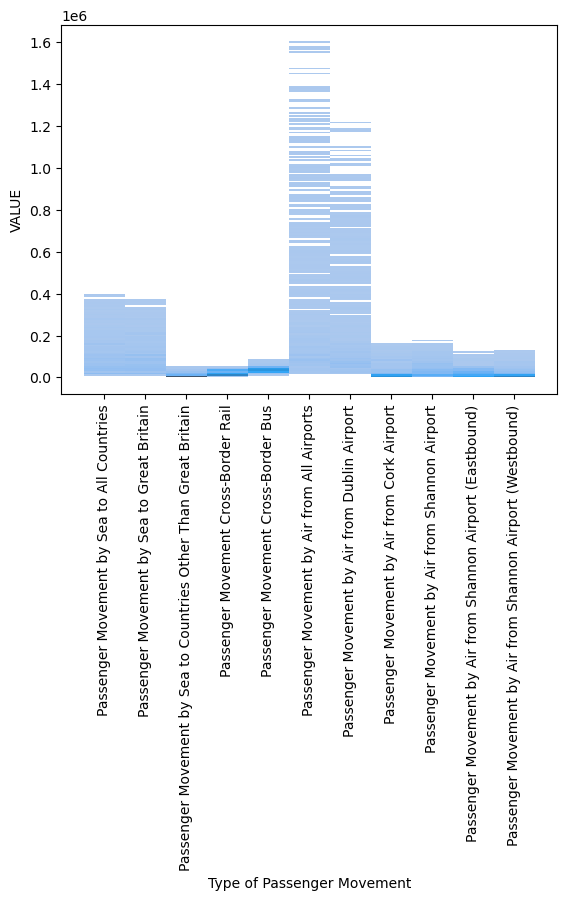

In [28]:
sns.histplot(data=arriving_df, x="Type of Passenger Movement", y="VALUE") #why are there white lines?
plt.xticks(rotation=90)

In [ ]:
sns.histplot(data=departing_df, x="Type of Passenger Movement", y="VALUE")
plt.xticks(rotation=90)

In [ ]:
#this needs to be summed across all the categories and replotted
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(departing_df["decimal_year"], departing_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers leaving")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))
ax.scatter(arriving_df["decimal_year"], arriving_df["VALUE"])
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()

In [ ]:
arriving_by_air_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]  
arriving_by_sea_df = arriving_df[arriving_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
departing_by_air_df = departing_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Air from All Airports'])]
departing_by_sea_df = departing_df[departing_df['Type of Passenger Movement'].isin(['Passenger Movement by Sea to All Countries'])]
#Make this into a for loop
#For comparison of methods of entering the country

In [ ]:
arriving_by_air_df.head(20)

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(arriving_by_air_df["decimal_year"], arriving_by_air_df["VALUE"], s=10, c='b', marker="s", label='air')
ax.scatter(arriving_by_sea_df["decimal_year"], arriving_by_sea_df["VALUE"], c='r', marker="o", label='sea')
plt.legend(loc='upper left')
ax.set_xlabel("Month")
ax.set_ylabel("Numbers arriving")
plt.show()

In [ ]:
sns.boxplot(y = 'VALUE', data = arriving_by_sea_df) #numbers arriving by sea have remained very stable over the years - presents better on the boxplot, too much variance otherwise
plt.title('Boxplot') 

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y.%f', errors='coerce')

# Group by year and sum the values in the specified column
yearly_totals = df.groupby(df['Year'].dt.year)['column_name'].sum()

# Print the yearly totals
print(yearly_totals)

# Binomial Distribution

In [ ]:
#Looking into probability of arriving in to or out of the country
#Need to sum arcoss all the methods of entering and leaving to get the total inbound and outbound
    